In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ n = 10, h = 0.5 $$
$$ x_{0} = 0., x_{10} = 186.20 $$
$$ y_{0} = 0., y_{10} = 200 $$

$$ y_{i-1} - 2y_{i} + y_{i+1} = -gh^{2} $$
$$ x_{i-1} - 2x_{i} + x_{i+1} = 0 $$

$$ Vx_{0} = \frac{x_{0+1}-x_{0-1}}{2h} $$
$$ Vy_{0} = \frac{y_{0+1}-y_{0-1}}{2h} $$

In [2]:
y_boundary = np.array([0.,200.])

In [3]:
N = 10
t = np.linspace(0.,5.,N+1)
h = t[1]- t[0]

In [15]:
def GetMatrix(N):
    
    A = np.zeros((N+1,N+1))
    A[0,0] = 1.
    A[N,N] = 1.
    
    for i in range(1,N): # No tocar las fronteras
        A[i,i] = -2.
        A[i,i-1] = 1.
        A[i,i+1] = 1.
        
    return A

In [16]:
def Getb( N, yb, h, g = 9.81 ):
    
    b = np.zeros(N+1)
    b[:] = -g*h**2
    b[0] = yb[0]
    b[-1] = yb[-1]
    
    return b

In [17]:
T = GetMatrix(N)
b = Getb(N,y_boundary,h)

In [18]:
print(T)
print(b)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[  0.      -2.4525  -2.4525  -2.4525  -2.4525  -2.4525  -2.4525  -2.4525
  -2.4525  -2.4525 200.    ]


In [19]:
y = np.linalg.solve(T,b)
print(y)

[  0.       31.03625  59.62     85.75125 109.43    130.65625 149.43
 165.75125 179.62    191.03625 200.     ]


Text(0, 0.5, '$y[m]$')

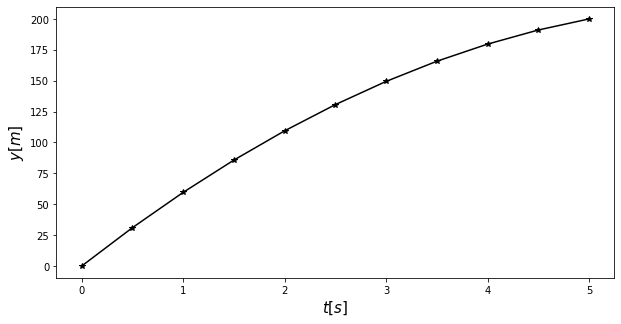

In [20]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(t,y,'-*',marker='*',color='k')
ax.set_xlabel(r'$t[s]$',fontsize=15)
ax.set_ylabel(r'$y[m]$',fontsize=15)

In [21]:
yn_1 = -9.81*h**2 + 2*y[0] - y[1]
print(yn_1)

-33.48875


In [23]:
vy = (y[1]-yn_1)/(2*h)
print(vy)

64.525
